In [132]:
import pandas as pd
import matplotlib.pyplot as plt

In [133]:
# Define the file path for the CSV file
file_path = 'intervention_feedback.csv'

In [134]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv(file_path)
data.head()

,subject,topic,grade,curriculum_rating,curriculum_comment,personalization_rating,personalization_comment
0,Mathematics,Addition,JSS1,5,Fit perfectly,4,Great
1,Computer studies,Computer software,Ss1,5,The plan bis well detailed,5,It easier to understand
2,Biology,Respiratory system,SSS2,5,Gives me more insight about the topic. As a te...,5,It adds more knowledge and makes the students ...
3,Mathematics,Maths operations in base 2,Jss1,3,NaN,3,NaN
4,Mathematics,Addition,JSS1,1,Nonw,1,Nibe


### Data Cleaning

In [135]:
# Clean the grade column
def clean_grade_column(grade):
    # Standardize the common forms for grades like JSS1, SS1, etc.
    grade = grade.strip().upper()
    mappings = {
        'JSS1': ['J1', 'JS1', 'JSS 1', 'JSS1', 'JSS 1', 'Jss 1', 'Jss1', 'Jss 1', 'Js1'],
        'JSS2': ['JSS 2', 'J2', 'JS2', 'JSS2', 'Jss2', 'Js2'],
        'JSS3': ['JSS 3', 'JS3', 'JSS3', 'Jss3', 'Js3'],
        'SS1': ['SS1', 'SSS1', 'SS 1', 'S.S.1', 'Ss1', 'SSI', 'S S 1'],
        'SS2': ['SS2', 'SS 2', 'S.S.2', 'Ss2', 'S S 2', 'SSS2', 'SSS2', 'SSS 2'],
        'SS3': ['SS3', 'SS 3', 'S.S.3', 'Ss3', 'S S 3', 'SSS3', 'Sss3'],
        'PRIMARY 2': ['Primary 2', 'Pri 2', 'PRIMARY TWO'],
        'PRIMARY 3': ['Primary 3', 'Primary three', 'Primary 3', 'Basic 3'],
        'PRIMARY 4': ['Primary 4', 'Primary four', 'PRIMARY FOUR', 'Pri 4'],
        'PRIMARY 5': ['Primary 5', 'Pri 5', 'PRIMARY FIVE','PRI 5','GRADE 5'],
        'PRIMARY 6': ['Primary 6', 'Pri 6'],
        'PRE SCHOOL': ['Pre School 1', 'Prep 1'],
        'UNIVERSITY LEVEL 300': ['University Level 300'],
    }

    # Iterate over the mapping dictionary to standardize the grades
    for standard_grade, variations in mappings.items():
        if grade in variations:
            return standard_grade
    return grade  # Return original if no match is found

grade = data['grade']
grade_list = list(grade)
cleaned_grades = [clean_grade_column(grade) for grade in grade_list]

data['clean_grade'] = [clean_grade_column(grade) for grade in grade_list]

data.head()

,subject,topic,grade,curriculum_rating,curriculum_comment,personalization_rating,personalization_comment,clean_grade
0,Mathematics,Addition,JSS1,5,Fit perfectly,4,Great,JSS1
1,Computer studies,Computer software,Ss1,5,The plan bis well detailed,5,It easier to understand,SS1
2,Biology,Respiratory system,SSS2,5,Gives me more insight about the topic. As a te...,5,It adds more knowledge and makes the students ...,SS2
3,Mathematics,Maths operations in base 2,Jss1,3,NaN,3,NaN,JSS1
4,Mathematics,Addition,JSS1,1,Nonw,1,Nibe,JSS1


In [136]:
# find the unique values in the 'clean_grade' column and their counts
grade_counts = data['clean_grade'].value_counts()
grade_counts

clean_grade
SS1                     29
SS2                     24
JSS1                    18
JSS2                    16
SS3                     16
JSS3                    15
PRIMARY 5                8
PRIMARY 3                4
PRIMARY 4                3
PRIMARY 2                3
PRE SCHOOL 1             1
UNIVERSITY LEVEL 300     1
PRIMARY 6                1
BASIC 3                  1
PREP 1                   1
12C MEDIA                1
Name: count, dtype: int64

In [137]:
# Clean the subject column
def clean_subject_column(subject):
	# Standardize the common forms for subjects like Mathematics, English, etc.
    subject = subject.strip().lower()
    mappings = {
        'mathematics': ['math', 'maths', 'mathematics', 'mathematic', 'mathematical','mathemtics'],
        'english': ['eng', 'english', 'engish', 'english language'],
        'science': ['sci', 'science', 'sciences'],
        'social studies': ['sst', 'social studies', 'social study'],
        'computer science': ['computer', 'computer science', 'computer studies'],
        'basic science': ['basic science', 'basic sciences'],
        'basic technology': ['basic tech', 'basic technology', 'basic techology'],
        'agricultural science': ['agric', 'agric science', 'agricultural science'],
        'physical and health education': ['phe', 'physical health education', 'physical health'],
        'business studies': ['business', 'business studies', 'business study'],
        'civic education': ['civic', 'civic education'],
        'home economics': ['home eco', 'home economics', 'home economic'],
        'fine art': ['fine art', 'fine arts'],
        'music': ['music', 'musics'],
        'yoruba': ['yoruba', 'yorub'],
        'french': ['french', 'french language'],
        'history': ['history', 'histories'],
        'geography': ['geography', 'geographies'],
        'government': ['government', 'governments'],
        'economics': ['economics', 'economic'],
        'literature': ['lit', 'literature', 'literatures'],
        'accounting': ['accounting', 'account'],
        'commerce': ['commerce', 'commerces'],
        'crs': ['crs', 'christian religious studies'],
        'irs': ['irs', 'islamic religious studies'],
        'irk': ['irk', 'islamic religious knowledge'],
        'health education': ['health', 'health education'],
        'physical education': ['physical education', 'physical educations'],
        'creative arts': ['creative arts', 'creative art'],
        'diction': ['diction', 'diction and phonetics'],
        'phonetics': ['phonetics', 'phonetic'],
        'phonics': ['phonics', 'phonetic'],
	            'phonology': ['phonology', 'phonologic'],
	            'phonological awareness': ['phonological awareness', 'phonological'],
	            'phonological processing': ['phonological processing', 'phonological process'],
	            'phonological disorder': ['phonological disorder', 'phonological disorders'],
    }
    # Iterate over the mapping dictionary to standardize the subjects
    for standard_subject, variations in mappings.items():
        if subject in variations:
            return standard_subject
    return subject  # Return original if no match is found
# Apply the clean_subject_column function to the 'subject' column
data['subject'] = data['subject'].apply(clean_subject_column)

# Display the cleaned 'subject' column
subjects_count = data['subject'].value_counts()
subjects_count

# Add new column called clean_subject to clean_data

	

subject
mathematics                              25
english                                  19
chemistry                                15
social studies                           10
computer science                          9
basic science                             8
physics                                   7
biology                                   6
agricultural science                      6
government                                3
civic education                           3
economics                                 2
technical drawing                         2
islamic studies                           2
physical and health education             2
security education                        1
phonics                                   1
media studies                             1
information technology                    1
accounting                                1
geography                                 1
financial accounting                      1
crs                     

### Quick overview of the intervention data

In [138]:
# Describe only the curriculum and personalization ratings
data[['curriculum_rating', 'personalization_rating']].describe().round()

,curriculum_rating,personalization_rating
count,142.0,142.0
mean,4.0,4.0
std,1.0,1.0
min,1.0,1.0
25%,3.0,3.0
50%,4.0,4.0
75%,5.0,5.0
max,5.0,5.0


### 1. Grade distribution

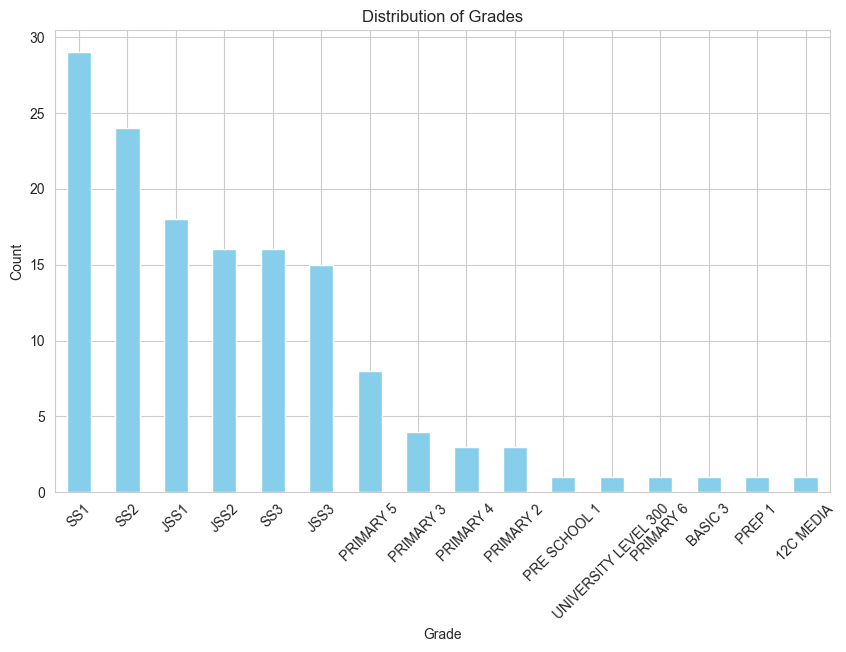

In [139]:
# Display the distribution of grades
plt.figure(figsize=(10, 6))
grade_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [140]:
clean_grade_index = data['clean_grade'].value_counts().index
clean_grade_values = data['clean_grade'].value_counts().values
grade_data = {'clean_grade': clean_grade_index, 'Count': clean_grade_values}
df = pd.DataFrame(grade_data)
# Calculating the total count
total_count = df['Count'].sum()
print(f'Total Count: {total_count}')
# Adding a new column for percentage
df['Percentage'] = ((df['Count'] / total_count) * 100).round(1)
Total_Percentage = df['Percentage'].sum()
print(f'Total Percentage: {Total_Percentage}')
# Display the DataFrame
df

Total Count: 142
Total Percentage: 100.0


,clean_grade,Count,Percentage
0,SS1,29,20.4
1,SS2,24,16.9
2,JSS1,18,12.7
3,JSS2,16,11.3
4,SS3,16,11.3
5,JSS3,15,10.6
6,PRIMARY 5,8,5.6
7,PRIMARY 3,4,2.8
8,PRIMARY 4,3,2.1
9,PRIMARY 2,3,2.1


### 2. Subject distribution

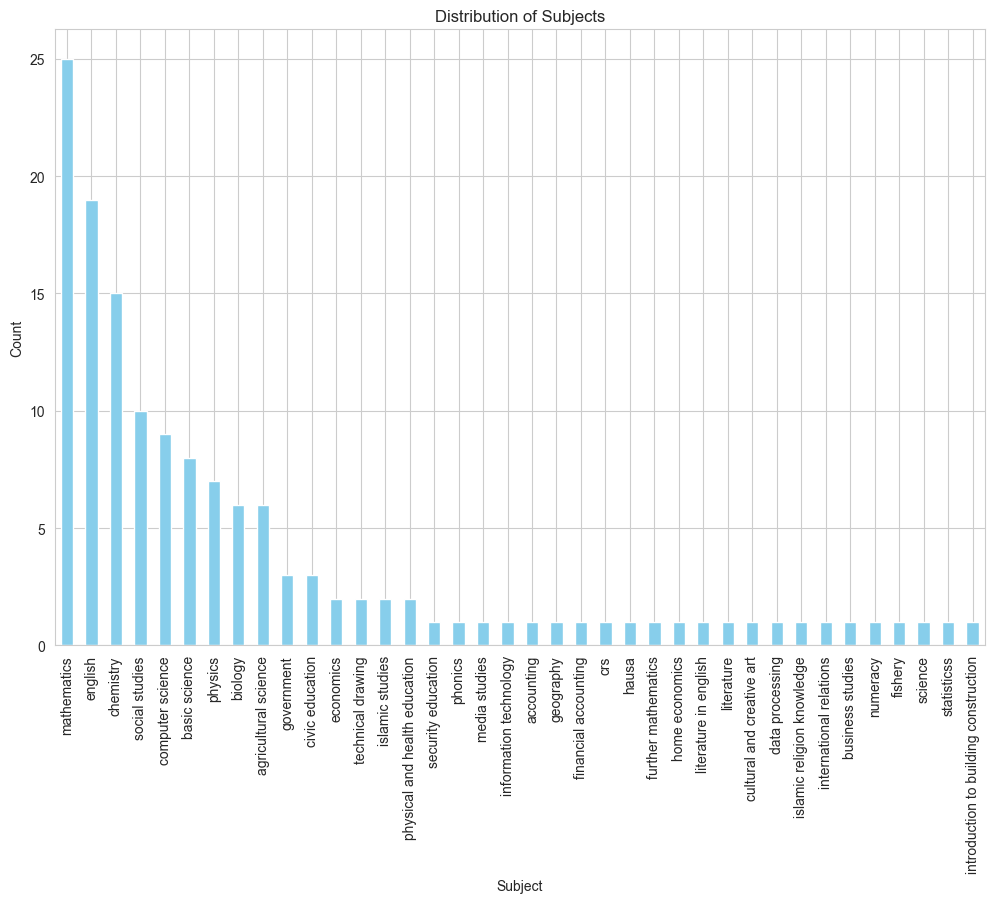

In [141]:
# Display the distribution of subjects
plt.figure(figsize=(12, 8))
subjects_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Subjects')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [142]:
# Display the distribution of subjects
subjects_index = subjects_count.index
subjects_values = subjects_count.values
subjects_data = {'subject': subjects_index, 'Count': subjects_values}
df = pd.DataFrame(subjects_data)
# Calculating the total count
total_count = df['Count'].sum()
print(f'Total Count: {total_count}')
# Adding a new column for percentage
df['Percentage'] = ((df['Count'] / total_count) * 100).round(1)
Total_Percentage = df['Percentage'].sum()
print(f'Total Percentage: {Total_Percentage}')
# Display the DataFrame
df

Total Count: 142
Total Percentage: 99.70000000000002


,subject,Count,Percentage
0,mathematics,25,17.6
1,english,19,13.4
2,chemistry,15,10.6
3,social studies,10,7.0
4,computer science,9,6.3
5,basic science,8,5.6
6,physics,7,4.9
7,biology,6,4.2
8,agricultural science,6,4.2
9,government,3,2.1


In [143]:
data.head()

,subject,topic,grade,curriculum_rating,curriculum_comment,personalization_rating,personalization_comment,clean_grade
0,mathematics,Addition,JSS1,5,Fit perfectly,4,Great,JSS1
1,computer science,Computer software,Ss1,5,The plan bis well detailed,5,It easier to understand,SS1
2,biology,Respiratory system,SSS2,5,Gives me more insight about the topic. As a te...,5,It adds more knowledge and makes the students ...,SS2
3,mathematics,Maths operations in base 2,Jss1,3,NaN,3,NaN,JSS1
4,mathematics,Addition,JSS1,1,Nonw,1,Nibe,JSS1


In [144]:
### 3. Curriculum and Personalization Ratings

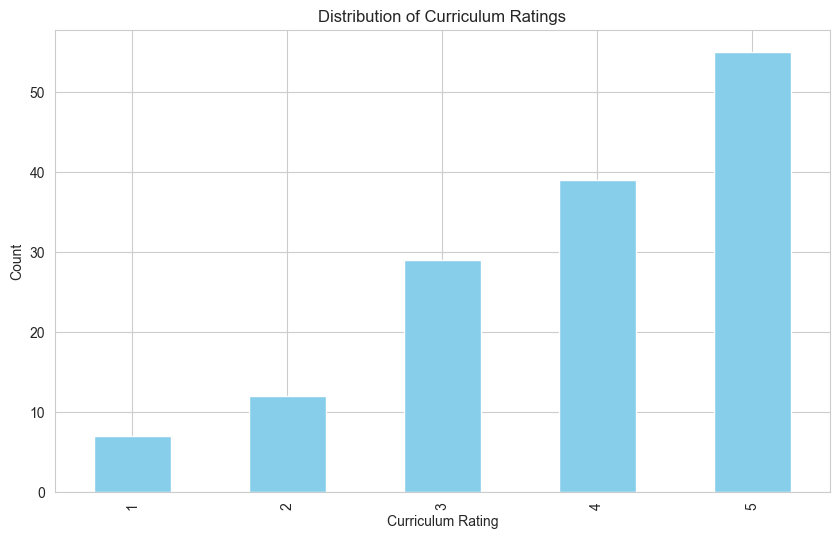

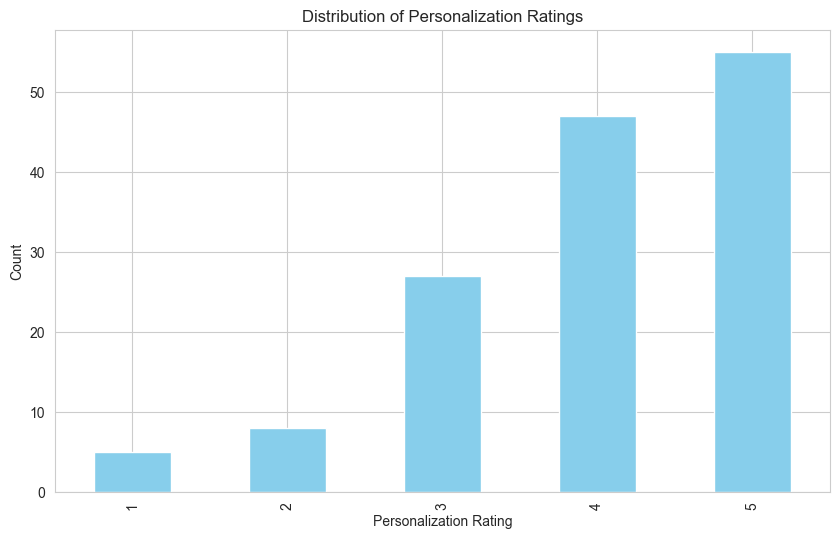

In [145]:
# Display the distribution of curriculum ratings
plt.figure(figsize=(10, 6))
data['curriculum_rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Curriculum Ratings')
plt.xlabel('Curriculum Rating')
plt.ylabel('Count')
plt.show()

# Display the distribution of personalization ratings
plt.figure(figsize=(10, 6))
data['personalization_rating'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Personalization Ratings')
plt.xlabel('Personalization Rating')
plt.ylabel('Count')
plt.show()

### Exploratory Data Analysis

In [146]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Load spaCy's small English model
nlp = spacy.load('en_core_web_sm')

# Stopwords from spaCy
stop_words = nlp.Defaults.stop_words

# Preprocessing function using spaCy
def preprocess_text_spacy(text):
    doc = nlp(text.lower())  # Process the text with spaCy
    tokens = [token.text for token in doc if token.is_alpha and token.text not in stop_words]
    return ' '.join(tokens)

# Preprocess each column separately
data['curriculum_comment'] = data['curriculum_comment'].fillna('').apply(preprocess_text_spacy)
data['personalization_comment'] = data['personalization_comment'].fillna('').apply(preprocess_text_spacy)

# Function for vectorization
def vectorize_text(data, column):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2)
    return vectorizer, vectorizer.fit_transform(data[column])

# Vectorizing each feedback column
vectorizer_curriculum_comment, curriculum_comment_matrix = vectorize_text(data, 'curriculum_comment')
vectorizer_personalization_comment, personalization_comment_matrix = vectorize_text(data, 'personalization_comment')

# Apply LDA for topic modeling
def apply_lda(matrix, n_components=5):
    lda = LatentDirichletAllocation(n_components=n_components, random_state=0)
    lda.fit(matrix)
    return lda

lda_curriculum_comment = apply_lda(curriculum_comment_matrix)
lda_personalization_comment = apply_lda(personalization_comment_matrix)

# Function to get dominant topic per document
def get_dominant_topic(lda_model, matrix):
    topic_distributions = lda_model.transform(matrix)
    return np.argmax(topic_distributions, axis=1)

# Print top terms for each topic
def print_top_terms(lda_model, vectorizer, n_top_words=10):
    terms = vectorizer.get_feature_names_out()
    for index, topic in enumerate(lda_model.components_):
        print(f'Theme {index}:')
        print([terms[i] for i in topic.argsort()[-n_top_words:]])
    

In [147]:
# Print themes for AI Expectations
print("curriculum_comment Themes:")
print_top_terms(lda_curriculum_comment, vectorizer_curriculum_comment)

# Get dominant topics for each feedback curriculum_comment
curriculum_comment_dominant_topic = get_dominant_topic(lda_curriculum_comment, curriculum_comment_matrix)
data['dominant_curriculum_comment_theme'] = curriculum_comment_dominant_topic

# Display dominant topic counts
curriculum_comment_theme_counts = data['dominant_curriculum_comment_theme'].value_counts()

curriculum_comment Themes:
Theme 0:
['students', 'perfectly', 'topic', 'student', 'subject', 'evaluation', 'aligned', 'objectives', 'lesson', 'plan']
Theme 1:
['best', 'subtopics', 'need', 'teacher', 'planned', 'covered', 'students', 'perfectly', 'lesson', 'plan']
Theme 2:
['order', 'know', 'teach', 'aligns', 'topic', 'objectives', 'content', 'good', 'plan', 'lesson']
Theme 3:
['learning', 'gave', 'ss', 'included', 'line', 'teaching', 'great', 'curriculum', 'scheme', 'work']
Theme 4:
['like', 'explanation', 'expectations', 'main', 'topic', 'inline', 'clearly', 'detailed', 'presented', 'amazing']


In [148]:
# Display the themes along with their counts
print("Dominating Curriculum Themes:")

# Create a mapping from theme index to terms
terms_curriculum_comment = vectorizer_curriculum_comment.get_feature_names_out()
for theme_idx, count in curriculum_comment_theme_counts.items():
    top_terms = [terms_curriculum_comment[i] for i in lda_curriculum_comment.components_[theme_idx].argsort()[-10:]]
    print(f"Theme {theme_idx}: {' '.join(top_terms)} (Count: {count})")

Dominating Curriculum Themes:
Theme 0: students perfectly topic student subject evaluation aligned objectives lesson plan (Count: 76)
Theme 2: order know teach aligns topic objectives content good plan lesson (Count: 22)
Theme 1: best subtopics need teacher planned covered students perfectly lesson plan (Count: 18)
Theme 4: like explanation expectations main topic inline clearly detailed presented amazing (Count: 13)
Theme 3: learning gave ss included line teaching great curriculum scheme work (Count: 13)


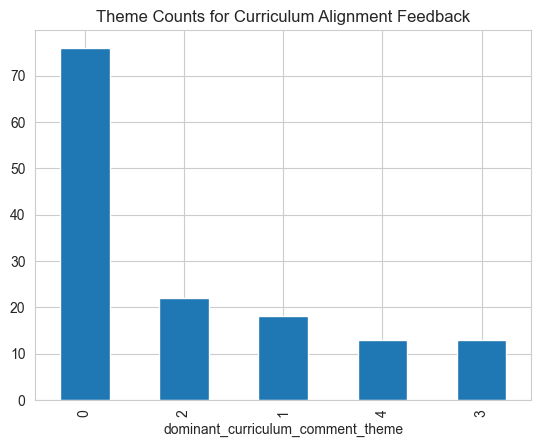

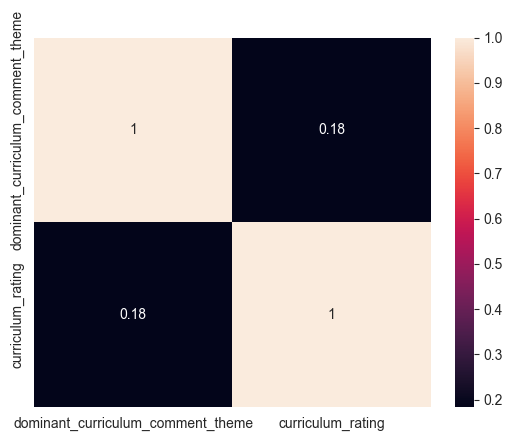

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for theme counts
theme_counts = data['dominant_curriculum_comment_theme'].value_counts()
theme_counts.plot(kind='bar', title='Theme Counts for Curriculum Alignment Feedback')
plt.show()

# Heatmap for correlations
correlation_matrix = data[['dominant_curriculum_comment_theme', 'curriculum_rating']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [150]:
# Print themes for Personalization
print("personalization_comment Themes:")
print_top_terms(lda_personalization_comment, vectorizer_personalization_comment)

# Get dominant topics for each feedback personalization_comment
personalization_comment_dominant_topic = get_dominant_topic(lda_personalization_comment, personalization_comment_matrix)
data['dominant_personalization_comment_theme'] = personalization_comment_dominant_topic

# Display dominant topic counts
personalization_comment_theme_counts = data['dominant_personalization_comment_theme'].value_counts()

personalization_comment Themes:
Theme 0:
['drug', 'critical', 'role', 'center', 'topic', 'classroom', 'activity', 'need', 'learning', 'students']
Theme 1:
['group', 'individual', 'explanation', 'idea', 'teaching', 'learners', 'work', 'room', 'centred', 'student']
Theme 2:
['adequate', 'understand', 'covered', 'needed', 'learner', 'centered', 'students', 'good', 'lesson', 'plan']
Theme 3:
['meet', 'centered', 'personalized', 'understand', 'understanding', 'class', 'good', 'activities', 'needs', 'students']
Theme 4:
['presentation', 'information', 'great', 'knowledge', 'pupils', 'plan', 'objectives', 'learning', 'students', 'lesson']


In [151]:
# Display the themes along with their counts
print("Dominating Personalization Themes:")
# Create a mapping from theme index to terms
terms_personalization_comment = vectorizer_personalization_comment.get_feature_names_out()
for theme_idx, count in personalization_comment_theme_counts.items():
    top_terms = [terms_personalization_comment[i] for i in lda_personalization_comment.components_[theme_idx].argsort()[-10:]]
    print(f"Theme {theme_idx}: {' '.join(top_terms)} (Count: {count})")


Dominating Personalization Themes:
Theme 0: drug critical role center topic classroom activity need learning students (Count: 86)
Theme 4: presentation information great knowledge pupils plan objectives learning students lesson (Count: 20)
Theme 2: adequate understand covered needed learner centered students good lesson plan (Count: 14)
Theme 3: meet centered personalized understand understanding class good activities needs students (Count: 12)
Theme 1: group individual explanation idea teaching learners work room centred student (Count: 10)


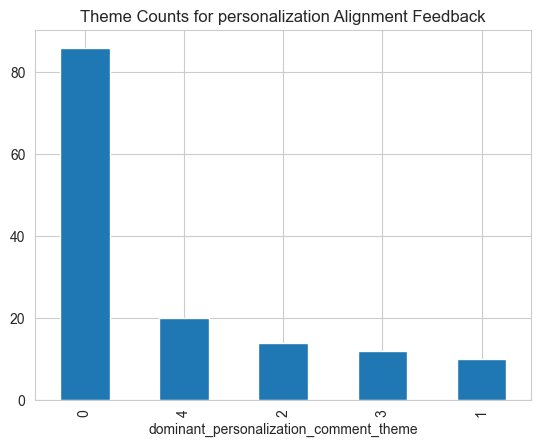

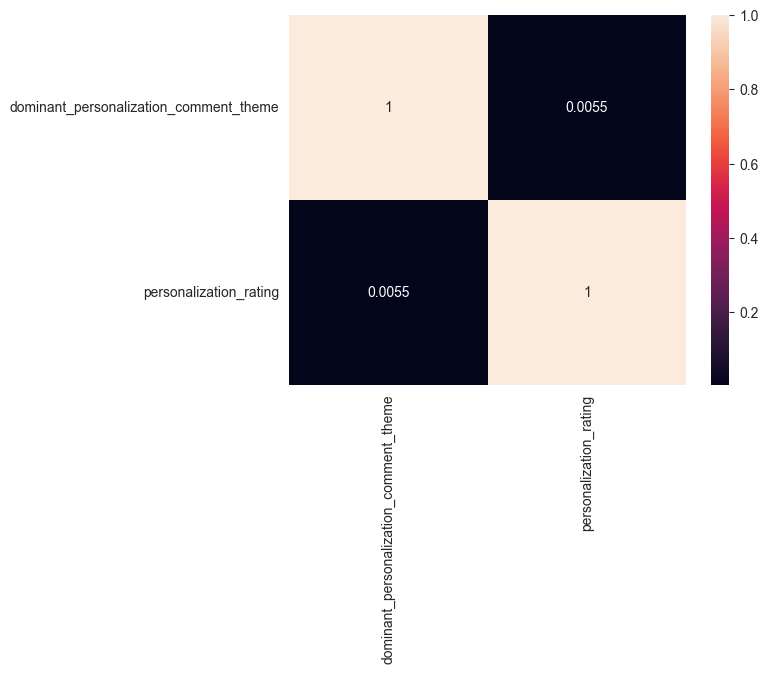

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for theme counts
theme_counts = data['dominant_personalization_comment_theme'].value_counts()
theme_counts.plot(kind='bar', title='Theme Counts for personalization Alignment Feedback')
plt.show()

# Heatmap for correlations
correlation_matrix = data[['dominant_personalization_comment_theme', 'personalization_rating']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Descriptive Statistics

In [153]:
import scipy.stats as stats

# Checking correlation between dominant curriculum theme and subject
correlation, p_value = stats.spearmanr(data['dominant_curriculum_comment_theme'],
                                       data['subject'])

print(f"Spearman Correlation: {correlation}, P-value: {p_value}")

Spearman Correlation: -0.11038067092654248, P-value: 0.19097118674771688


In [154]:
# Checking correlation between dominant curriculum theme and grade
correlation, p_value = stats.spearmanr(data['dominant_curriculum_comment_theme'],
                                       data['clean_grade'])

print(f"Spearman Correlation: {correlation}, P-value: {p_value}")

Spearman Correlation: 0.19122114312717284, P-value: 0.022631399335369763


In [155]:
# Checking correlation between dominant personalization theme and subject
correlation, p_value = stats.spearmanr(data['dominant_personalization_comment_theme'],
                                       data['subject'])

print(f"Spearman Correlation: {correlation}, P-value: {p_value}")

Spearman Correlation: -0.06458010755047289, P-value: 0.4451316223718803


In [156]:
# Checking correlation between dominant personalization theme and grade
correlation, p_value = stats.spearmanr(data['dominant_personalization_comment_theme'],
                                       data['clean_grade'])

print(f"Spearman Correlation: {correlation}, P-value: {p_value}")

Spearman Correlation: -0.02315938563017376, P-value: 0.7844125037740918


### theme counts and heatmap

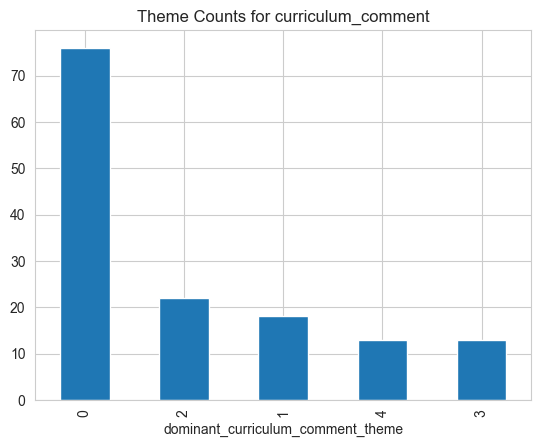

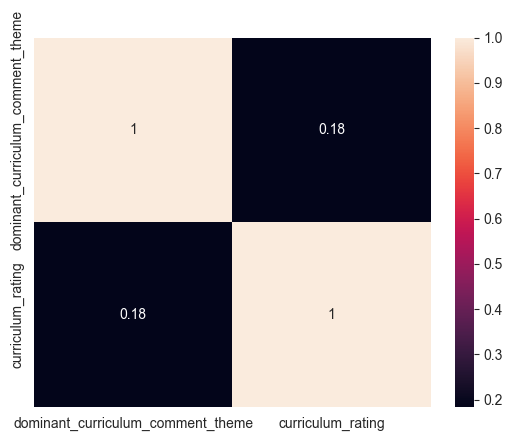

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for theme counts
theme_counts = data['dominant_curriculum_comment_theme'].value_counts()
theme_counts.plot(kind='bar', title='Theme Counts for curriculum_comment')
plt.show()

# Heatmap for correlations
correlation_matrix = data[['dominant_curriculum_comment_theme', 'curriculum_rating']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [158]:
import pandas as pd
data_clean = pd.DataFrame(data)
data_clean

,subject,topic,grade,curriculum_rating,curriculum_comment,personalization_rating,personalization_comment,clean_grade,dominant_curriculum_comment_theme,dominant_personalization_comment_theme
0,mathematics,Addition,JSS1,5,fit perfectly,4,great,JSS1,1,4
1,computer science,Computer software,Ss1,5,plan bis detailed,5,easier understand,SS1,4,3
2,biology,Respiratory system,SSS2,5,gives insight topic teacher helps teach know,5,adds knowledge makes students stand learning use,SS2,2,4
3,mathematics,Maths operations in base 2,Jss1,3,,3,,JSS1,0,0
4,mathematics,Addition,JSS1,1,nonw,1,nibe,JSS1,0,0
...,...,...,...,...,...,...,...,...,...,...
137,agricultural science,Environmental physiology,SS2,1,environmental physiology agricultural science ...,2,account collaboration critical thinking skills...,SS2,0,0
138,english,Irregular Verbs,JS2,5,works actual guide introducing lesson followin...,4,pupils ability differ impossible lesson intern...,JSS2,2,4
139,technical drawing,Free hand sketching drawing,Ss3,4,,5,,SS3,0,0
140,media studies,Media theory,12c Media,2,fairly generic match exam board requirements,2,generic,12C MEDIA,1,0


### Descriptive Statistics

In [159]:
# Summarize mean, median, mode, standard deviation, and distribution of curriculum and personalization ratings
desc_stats = data_clean[['curriculum_rating', 'personalization_rating']].describe()
print(desc_stats)

       curriculum_rating  personalization_rating
count         142.000000              142.000000
mean            3.866197                3.978873
std             1.168310                1.061701
min             1.000000                1.000000
25%             3.000000                3.000000
50%             4.000000                4.000000
75%             5.000000                5.000000
max             5.000000                5.000000


In [160]:
# Calculate mode for curriculum and personalization ratings
mode_curriculum_rating = data_clean['curriculum_rating'].mode()[0]
mode_personalization_rating = data_clean['personalization_rating'].mode()[0]
print(f"Mode of Curriculum Rating: {mode_curriculum_rating}")
print(f"Mode of Personalization Rating: {mode_personalization_rating}")

Mode of Curriculum Rating: 5
Mode of Personalization Rating: 5


In [161]:
# Frequency distribution of different graded and their curriculum ratings
frequency_distribution = data_clean.groupby('clean_grade')[['curriculum_rating']].value_counts().unstack(fill_value=0)
frequency_distribution

curriculum_rating,1,2,3,4,5
clean_grade,,,,,
12C MEDIA,0,1,0,0,0
BASIC 3,0,0,0,0,1
JSS1,2,0,4,4,8
JSS2,0,1,1,4,10
JSS3,0,2,4,4,5
PRE SCHOOL 1,0,0,1,0,0
PREP 1,1,0,0,0,0
PRIMARY 2,0,2,0,0,1
PRIMARY 3,0,0,1,0,3


In [162]:
# Frequency distribution of different graded and their personalization ratings
frequency_distribution = data_clean.groupby('clean_grade')[['personalization_rating']].value_counts().unstack(fill_value=0)
frequency_distribution

personalization_rating,1,2,3,4,5
clean_grade,,,,,
12C MEDIA,0,1,0,0,0
BASIC 3,0,0,0,1,0
JSS1,1,0,4,5,8
JSS2,0,0,1,6,9
JSS3,0,0,5,4,6
PRE SCHOOL 1,0,0,1,0,0
PREP 1,1,0,0,0,0
PRIMARY 2,0,2,0,0,1
PRIMARY 3,0,0,0,1,3


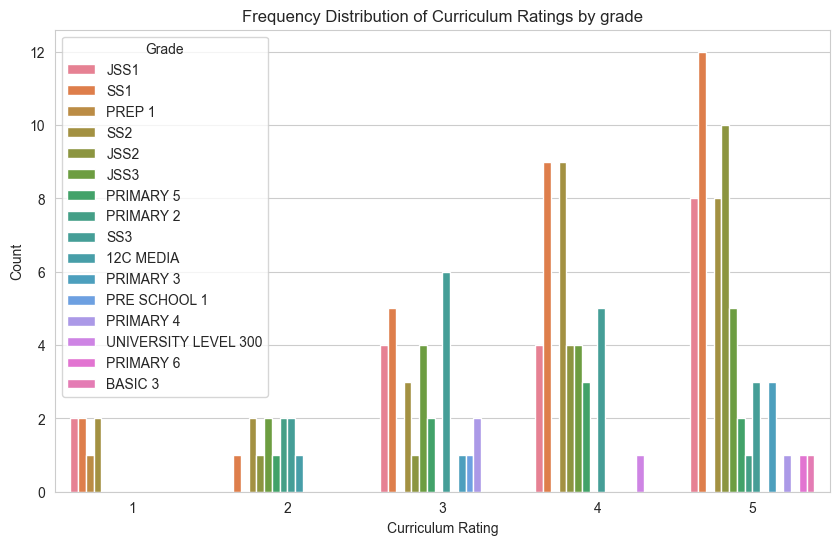

In [163]:
# Plot the frequency distribution of curriculum and personalization ratings by grade
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(10, 6))

# Plot frequency distribution for curriculum ratings
sns.countplot(data=data_clean, x='curriculum_rating', hue='clean_grade')
plt.title('Frequency Distribution of Curriculum Ratings by grade')
plt.xlabel('Curriculum Rating')
plt.ylabel('Count')
plt.legend(title='Grade')
plt.show()

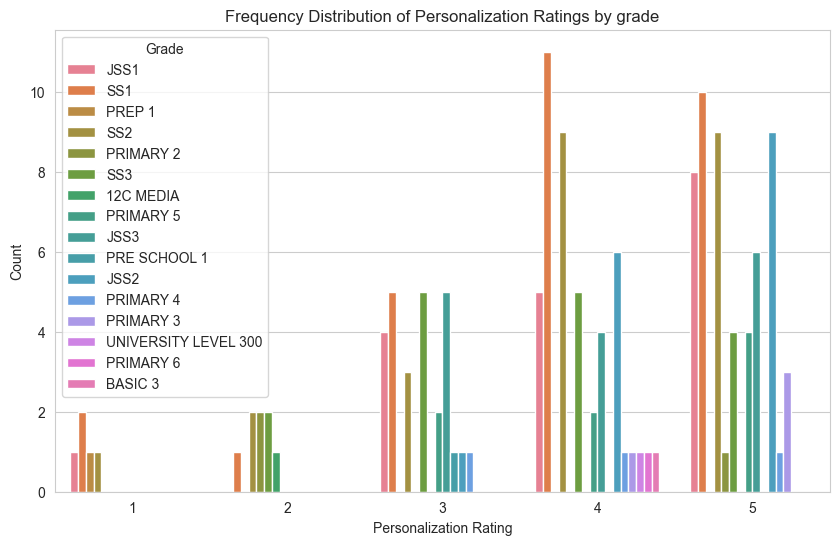

In [164]:
# Plot the frequency distribution of curriculum and personalization ratings by grade
# Set up a new plotting area for personalization ratings
plt.figure(figsize=(10, 6))

# Plot frequency distribution for personalization ratings
sns.countplot(data=data_clean, x='personalization_rating', hue='clean_grade')
plt.title('Frequency Distribution of Personalization Ratings by grade')
plt.xlabel('Personalization Rating')
plt.ylabel('Count')
plt.legend(title='Grade')
plt.show()

### Subject and curriculum/personalization ratings

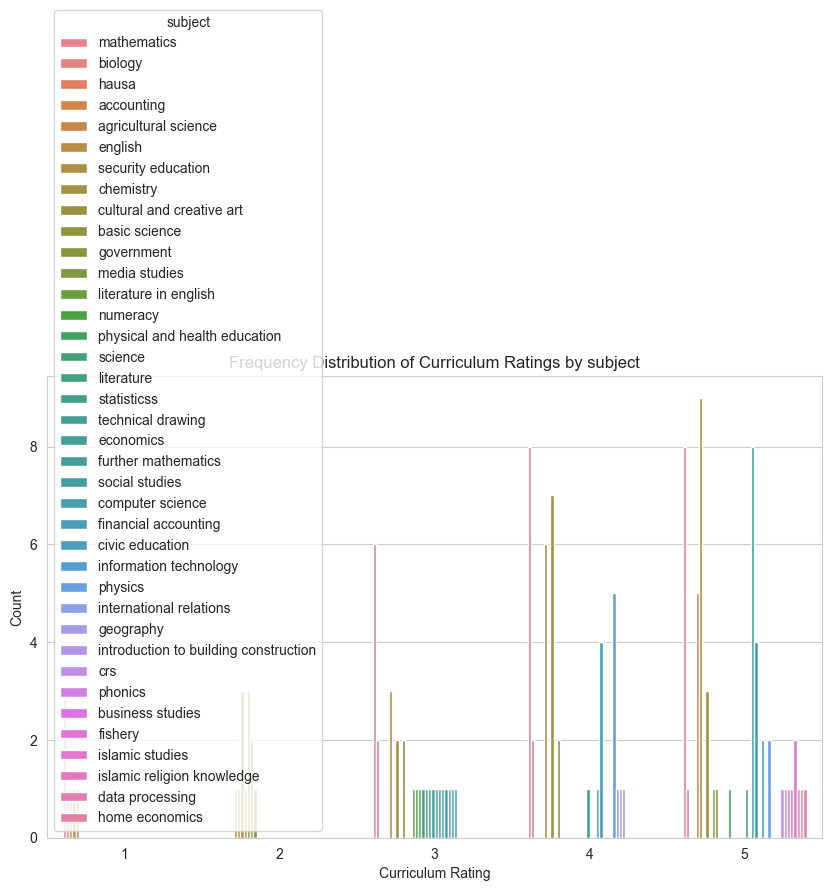

In [165]:
# Plot the frequency distribution of curriculum and personalization ratings by grade
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting area
plt.figure(figsize=(10, 6))

# Plot frequency distribution for curriculum ratings
sns.countplot(data=data_clean, x='curriculum_rating', hue='subject')
plt.title('Frequency Distribution of Curriculum Ratings by subject')
plt.xlabel('Curriculum Rating')
plt.ylabel('Count')
plt.legend(title='subject')
plt.show()

In [166]:
correlation_curriculum_personalization = data[['curriculum_rating', 'personalization_rating']].corr()

# Display the correlation matrix
correlation_curriculum_personalization

,curriculum_rating,personalization_rating
curriculum_rating,1.000000,0.843922
personalization_rating,0.843922,1.000000


In [167]:
correlation_curriculum_personalization = data[['curriculum_rating', 'personalization_rating']].corr(method='spearman')

# Display the correlation matrix
correlation_curriculum_personalization

,curriculum_rating,personalization_rating
curriculum_rating,1.000000,0.810909
personalization_rating,0.810909,1.000000


### Correlation Matrix for Selected Columns

In [168]:
columns_of_interest = [
    "curriculum_rating",
    "personalization_rating",
]

### Pearson correlation coefficient metrix and the p-value


In [169]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

th_data = data.dropna(subset=columns_of_interest)
transformed_header_data = th_data
# Create empty DataFrames for storing correlation coefficients and p-values
correlation_matrix = pd.DataFrame(np.zeros((len(columns_of_interest), len(columns_of_interest))), 
                                  columns=columns_of_interest, 
                                  index=columns_of_interest)

p_value_matrix = pd.DataFrame(np.zeros((len(columns_of_interest), len(columns_of_interest))), 
                              columns=columns_of_interest, 
                              index=columns_of_interest)

# Calculate Pearson correlation and p-values
for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        if col1 == col2:
            # Fill diagonal with 1 for correlation and 0 for p-values
            correlation_matrix.loc[col1, col2] = 1.0
            p_value_matrix.loc[col1, col2] = 0.0
        else:
            # Compute Pearson correlation and p-value
            corr, p_val = pearsonr(transformed_header_data[col1], transformed_header_data[col2])
            correlation_matrix.loc[col1, col2] = corr
            p_value_matrix.loc[col1, col2] = p_val

# Function to format both correlation and p-value
def custom_format(corr, p):
    if p < 0.001:
        return f'{corr:.2f}\n(p<{p:.3f})'  # Display up to 3 decimal places for small p-values
    else:
        return f'{corr:.2f}\n(p={p:.3f})'

# Create a DataFrame for formatted correlation and p-values
formatted_matrix = pd.DataFrame('', columns=columns_of_interest, index=columns_of_interest, dtype='object')

# Apply custom formatting to combine correlation and p-values
for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        formatted_matrix.loc[col1, col2] = custom_format(correlation_matrix.loc[col1, col2], p_value_matrix.loc[col1, col2])

# Apply background gradient only on the correlation values

# Apply background gradient only on the correlation values
styled_matrix = correlation_matrix.style.background_gradient(cmap='coolwarm') \
    .set_caption("Pearson Correlation Matrix with P-values for Selected Columns") \
    .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16px')]}])

# Display formatted matrix (correlation coefficients and p-values) without background gradient
styled_matrix_with_text = formatted_matrix.style.set_properties(**{'white-space': 'pre'}) \
    .set_caption("Pearson Correlation Matrix with P-values for Selected Columns") \
    .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16px')]}])

# Display both matrices
styled_matrix_with_text

,curriculum_rating,personalization_rating
curriculum_rating,1.00 (p<0.000),0.84 (p<0.000)
personalization_rating,0.84 (p<0.000),1.00 (p<0.000)


### 2. Spearman Correlation Matrix for Selected Columns


In [170]:
import numpy as np
from scipy.stats import spearmanr

def custom_format(corr, p):
    # Check if the p-value is very small, display more precision
    if p < 0.001:
        return f'{corr:.2f}\n(p={p:.6f})'  # Display up to 6 decimal places for small p-values
    else:
        return f'{corr:.2f}\n(p={p:.3f})'

# Assuming 'data' is your DataFrame and 'columns_of_interest' contains the columns you want to analyze
data = transformed_header_data
data_subset = data[columns_of_interest]

# Create empty DataFrames for storing correlation coefficients and p-values
spearman_corr = pd.DataFrame(np.zeros((len(columns_of_interest), len(columns_of_interest))), 
                             columns=columns_of_interest, 
                             index=columns_of_interest)

p_values = pd.DataFrame(np.zeros((len(columns_of_interest), len(columns_of_interest))), 
                        columns=columns_of_interest, 
                        index=columns_of_interest)

clean_data = data.dropna(subset=columns_of_interest)

# Calculate Spearman correlation and p-values
for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        if col1 == col2:
            spearman_corr.loc[col1, col2] = 1.0
            p_values.loc[col1, col2] = 0.0
        else:
            corr, p_val = spearmanr(clean_data[col1], clean_data[col2])
            spearman_corr.loc[col1, col2] = corr
            p_values.loc[col1, col2] = p_val

# Create a new DataFrame with dtype 'object' for storing formatted strings
combined = pd.DataFrame('', columns=columns_of_interest, index=columns_of_interest, dtype='object')

# Custom format for displaying both correlation and p-values
# def custom_format(corr, p):
#     return f'{corr:.2f}\n(p={p:.3f})'

# Apply custom formatting to combine correlation and p-values
for col1 in columns_of_interest:
    for col2 in columns_of_interest:
        combined.loc[col1, col2] = custom_format(spearman_corr.loc[col1, col2], p_values.loc[col1, col2])

# Styling the combined matrix
combined = combined.style.set_properties(**{'white-space': 'pre'}) \
    .set_caption("Spearman Correlation Matrix with P-values for Selected Columns") \
    .set_table_styles([{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16px')]}])

combined

,curriculum_rating,personalization_rating
curriculum_rating,1.00 (p=0.000000),0.81 (p=0.000000)
personalization_rating,0.81 (p=0.000000),1.00 (p=0.000000)


### Chi-Square Matrix for selected columns


In [171]:
# Chi-Square Test for all pairs of selected columns
from itertools import combinations
from scipy.stats import chi2_contingency
# Create a list of all possible pairs of selected columns
column_pairs = list(combinations(columns_of_interest, 2))
# Perform Chi-Square Test for each pair of columns
for pair in column_pairs:
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test for {pair[0]} and {pair[1]}:")
    print("Chi-Square Test Statistic:", chi2)
    print("p-value:", p)
    if p < 0.05:
        print("significant association", pair[0], "and", pair[1])
    else:
        print("no significant association", pair[0], "and", pair[1])
    print()

# Display the results in a matrix form
# Create an empty DataFrame to store the p-values
p_values_matrix = pd.DataFrame(1, columns=columns_of_interest, index=columns_of_interest,  dtype='float64')
# Fill the DataFrame with p-values
for pair in column_pairs:
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p_values_matrix.loc[pair[0], pair[1]] = p
    p_values_matrix.loc[pair[1], pair[0]] = p
    
# Display the p-values matrix
p_values_matrix.style.background_gradient(cmap='coolwarm').set_caption(
    "Chi-Square P-Values Matrix for Selected Columns"
).set_table_styles(
    [{'selector': 'caption', 'props': [('color', 'black'), ('font-size', '16px')]},]
)
    

Chi-Square Test for curriculum_rating and personalization_rating:
Chi-Square Test Statistic: 277.42866223820874
p-value: 1.1799566693886522e-49
significant association curriculum_rating and personalization_rating



,curriculum_rating,personalization_rating
curriculum_rating,1.000000,0.000000
personalization_rating,0.000000,1.000000


In [172]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Define the predictor (X) and target variable (y)
X = data['personalization_rating']
y = data['curriculum_rating']

# Add a constant to the model for statsmodels
X_with_constant = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X_with_constant).fit()

# Get the regression summary
regression_summary = model.summary()

# Extract key elements from the regression model's summary
regression_results = {
    'Coefficient': model.params,
    'Standard Error': model.bse,
    't-value': model.tvalues,
    'P>|t|': model.pvalues,
    '95% Conf. Interval (Lower)': model.conf_int()[0],
    '95% Conf. Interval (Upper)': model.conf_int()[1]
}

# Convert the results to a pandas DataFrame for better presentation
regression_df = pd.DataFrame(regression_results)
regression_table = pd.DataFrame(regression_results, index=['const', 'personalization_rating'])

# Display the table to the user
regression_table


,Coefficient,Standard Error,t-value,P>|t|,95% Conf. Interval (Lower),95% Conf. Interval (Upper)
const,0.171164,0.205413,0.833269,4.061123e-01,-0.234948,0.577276
personalization_rating,0.928663,0.049892,18.613368,1.087404e-39,0.830024,1.027303


### Theme Extraction and Sentiment Analysis


In [173]:
data_clean.columns

Index(['subject', 'topic', 'grade', 'curriculum_rating', 'curriculum_comment',
       'personalization_rating', 'personalization_comment', 'clean_grade',
       'dominant_curriculum_comment_theme',
       'dominant_personalization_comment_theme'],
      dtype='object')

In [174]:
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

# Load spaCy's small English model
nlp = spacy.load('en_core_web_sm')

# Stopwords from spaCy
stop_words = nlp.Defaults.stop_words

# Preprocessing function using spaCy
def preprocess_text_spacy(text):
    doc = nlp(text.lower())  # Process the text with spaCy
    tokens = [token.text for token in doc if token.is_alpha and token.text not in stop_words]
    return ' '.join(tokens)

# Preprocess each column separately
data['curriculum_comment'] = data['curriculum_comment'].fillna('').apply(preprocess_text_spacy)

# Function for vectorization
def vectorize_text(data, column):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2)
    return vectorizer, vectorizer.fit_transform(data[column])

# Vectorizing each feedback column
vectorizer_curriculum_comment, curriculum_comment_matrix = vectorize_text(transformed_header_data, 'curriculum_comment')


# Apply LDA for topic modeling
def apply_lda(matrix, n_components=5):
    lda = LatentDirichletAllocation(n_components=n_components, random_state=0)
    lda.fit(matrix)
    return lda

lda_curriculum_comment = apply_lda(curriculum_comment_matrix)

# Function to get dominant topic per document
def get_dominant_topic(lda_model, matrix):
    topic_distributions = lda_model.transform(matrix)
    return np.argmax(topic_distributions, axis=1)

# Print top terms for each topic
def print_top_terms(lda_model, vectorizer, n_top_words=10):
    terms = vectorizer.get_feature_names_out()
    for index, topic in enumerate(lda_model.components_):
        print(f'Theme {index}:', [terms[i] for i in topic.argsort()[-n_top_words:]])

# Print themes for AI Expectations
print("curriculum_comment Themes:")
print_top_terms(lda_curriculum_comment, vectorizer_curriculum_comment)

# Get dominant topics for each feedback column
curriculum_comment_dominant_topic = get_dominant_topic(lda_curriculum_comment, curriculum_comment_matrix)
transformed_header_data['dominant_curriculum_comment_theme'] = curriculum_comment_dominant_topic

# Display dominant topic counts
curriculum_comment_theme_counts = transformed_header_data['dominant_curriculum_comment_theme'].value_counts()
# Display the themes along with their counts
print("Dominating curriculum_comment Themes:")

# Create a mapping from theme index to terms
terms_curriculum_comment = vectorizer_curriculum_comment.get_feature_names_out()
for theme_idx, count in curriculum_comment_theme_counts.items():
    top_terms = [terms_curriculum_comment[i] for i in lda_curriculum_comment.components_[theme_idx].argsort()[-10:]]
    print(f"Theme {theme_idx}: {' '.join(top_terms)} (Count: {count})")


curriculum_comment Themes:
Theme 0: ['students', 'perfectly', 'topic', 'student', 'subject', 'evaluation', 'aligned', 'objectives', 'lesson', 'plan']
Theme 1: ['best', 'subtopics', 'need', 'teacher', 'planned', 'covered', 'students', 'perfectly', 'lesson', 'plan']
Theme 2: ['order', 'know', 'teach', 'aligns', 'topic', 'objectives', 'content', 'good', 'plan', 'lesson']
Theme 3: ['learning', 'gave', 'ss', 'included', 'line', 'teaching', 'great', 'curriculum', 'scheme', 'work']
Theme 4: ['like', 'explanation', 'expectations', 'main', 'topic', 'inline', 'clearly', 'detailed', 'presented', 'amazing']
Dominating curriculum_comment Themes:
Theme 0: students perfectly topic student subject evaluation aligned objectives lesson plan (Count: 76)
Theme 2: order know teach aligns topic objectives content good plan lesson (Count: 22)
Theme 1: best subtopics need teacher planned covered students perfectly lesson plan (Count: 18)
Theme 4: like explanation expectations main topic inline clearly detaile

In [175]:
import scipy.stats as stats

# Example: Checking correlation between theme and tool usage frequency
correlation, p_value = stats.spearmanr(transformed_header_data['dominant_curriculum_comment_theme'], transformed_header_data['curriculum_rating'])

print(f"Spearman Correlation: {correlation}, P-value: {p_value}")

Spearman Correlation: 0.21136589982658566, P-value: 0.011568225048564468


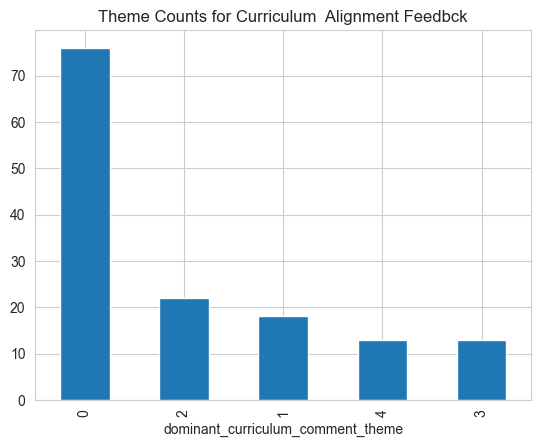

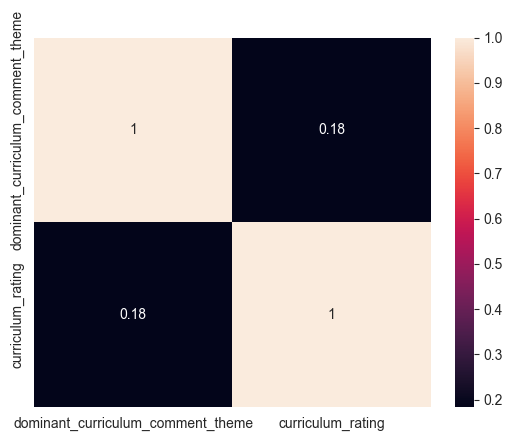

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for theme counts
theme_counts = transformed_header_data['dominant_curriculum_comment_theme'].value_counts()
theme_counts.plot(kind='bar', title='Theme Counts for Curriculum  Alignment Feedbck')
plt.show()

# Heatmap for correlations
correlation_matrix = transformed_header_data[['dominant_curriculum_comment_theme', 'curriculum_rating']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

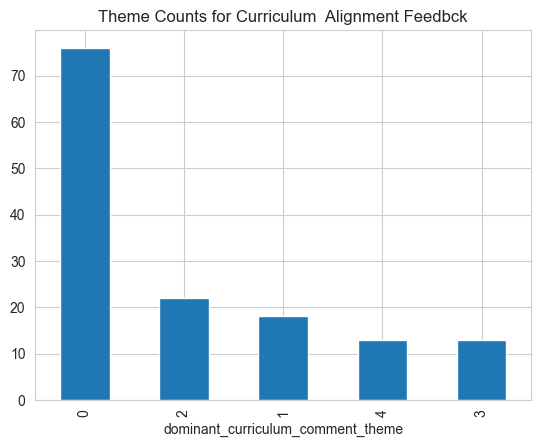

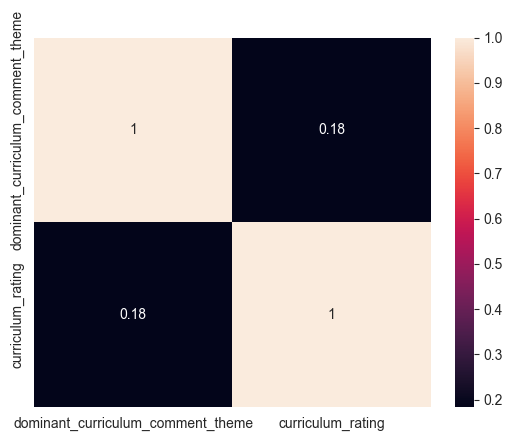

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for theme counts
theme_counts = transformed_header_data['dominant_curriculum_comment_theme'].value_counts()
theme_counts.plot(kind='bar', title='Theme Counts for Curriculum  Alignment Feedbck')
plt.show()

# Heatmap for correlations
correlation_matrix = transformed_header_data[['dominant_curriculum_comment_theme', 'curriculum_rating']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

### Sentiment Analysis

In [178]:
from textblob import TextBlob
# Perform sentiment analysis on the qualitative feedback
data['combined_feedback'] = data['curriculum_comment'].fillna('') + ' ' + data['personalization_comment'].fillna('')
# Calculate sentiment polarity (ranges from -1 to 1, where -1 is very negative and 1 is very positive)
data['sentiment'] = data['combined_feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)
# Display the sentiment scores for each feedback
sentiment_scores = data[['combined_feedback', 'sentiment']]
# Display the results
sentiment_scores

,combined_feedback,sentiment
0,fit perfectly great,0.600000
1,plan bis detailed easier understand,0.400000
2,gives insight topic teacher helps teach know a...,0.000000
3,,0.000000
4,nonw nibe,0.000000
...,...,...
137,environmental physiology agricultural science ...,0.000000
138,works actual guide introducing lesson followin...,0.077778
139,,0.000000
140,fairly generic match exam board requirements g...,0.000000


In [179]:
# Performing ANOVA to check for statistically significant differences in curriculum ratings across subjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
anova_model = ols('curriculum_rating ~ subject', data=data_clean).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Display the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
subject,68.689614,37.0,1.559961,0.041574
Residual,123.768133,104.0,NaN,NaN


In [180]:
# Performing ANOVA to check for statistically significant differences in personalisation ratings across subjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
anova_model = ols('personalization_rating ~ subject', data=data_clean).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Display the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
subject,58.973984,37.0,1.658267,0.024275
Residual,99.962636,104.0,NaN,NaN


In [181]:
# Performing ANOVA to check for statistically significant differences in curriculum ratings across grades
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model
anova_model = ols('curriculum_rating ~ clean_grade', data=data_clean).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Display the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
clean_grade,26.314451,15.0,1.330426,0.193682
Residual,166.143295,126.0,NaN,NaN


In [182]:
# Performing ANOVA to check for statistically significant differences in personalization ratings across grades
import statsmodels.api as sm
from statsmodels.formula.api import ols
    
# Fit the ANOVA model
anova_model = ols('personalization_rating ~ clean_grade', data=data_clean).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)

# Display the ANOVA table
anova_table

,sum_sq,df,F,PR(>F)
clean_grade,25.723353,15.0,1.622032,0.076706
Residual,133.213266,126.0,NaN,NaN


In [183]:
# Let's remove rows where either 'curriculum_comment' or 'personalization_comment' is an empty string, as well as NaN values.
data_cleaned_curriculum = data_clean[data_clean['curriculum_comment'].str.strip() != '']
data_cleaned_personalization = data_clean[data_clean['personalization_comment'].str.strip() != '']

# Display the cleaned columns
cleaned_curriculum_column = data_cleaned_curriculum[['curriculum_comment']]
cleaned_personalization_column = data_cleaned_personalization[['personalization_comment']]

# Show the cleaned curriculum and personalization feedback data after removing empty strings
curriculum_comment = cleaned_curriculum_column
personalization_comment = cleaned_personalization_column

In [184]:
# Let's conduct a simple thematic analysis by identifying common themes in the feedback columns
from collections import Counter

# Combine all open-ended feedback from the 'curriculum_comment' and 'personalization_comment' columns
feedback = data_clean['curriculum_comment'].fillna('') + ' ' + data_clean['personalization_comment'].fillna('')

# Tokenize and clean the feedback by splitting into individual words and removing common stopwords
stopwords = ['the', 'and', 'to', 'is', 'of', 'it', 'in', 'me', 'as', 'a', 'my', 'for', 'i']

# Tokenize and remove stopwords
tokens = [word.lower() for sentence in feedback for word in sentence.split() if word.lower() not in stopwords]

# Count the frequency of each word to identify common themes
word_freq = Counter(tokens)

# Display the most common words (themes)
common_themes = word_freq.most_common(10)

# Display the results
print(common_themes)

[('lesson', 50), ('students', 39), ('plan', 37), ('learning', 16), ('objectives', 16), ('topic', 11), ('work', 11), ('good', 11), ('need', 10), ('student', 9)]


In [185]:
from textblob import TextBlob

# Perform sentiment analysis on the qualitative feedback
data['combined_feedback'] = data['curriculum_comment'].fillna('') + ' ' + data['personalization_comment'].fillna('')

# Calculate sentiment polarity (ranges from -1 to 1, where -1 is very negative and 1 is very positive)
data['sentiment'] = data['combined_feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display the sentiment scores for each feedback
sentiment_scores = data[['combined_feedback', 'sentiment']]

# Display the results
sentiment_scores

,combined_feedback,sentiment
0,fit perfectly great,0.600000
1,plan bis detailed easier understand,0.400000
2,gives insight topic teacher helps teach know a...,0.000000
3,,0.000000
4,nonw nibe,0.000000
...,...,...
137,environmental physiology agricultural science ...,0.000000
138,works actual guide introducing lesson followin...,0.077778
139,,0.000000
140,fairly generic match exam board requirements g...,0.000000


In [186]:
# Let's extract more sentiment details: polarity and subjectivity using TextBlob
# Calculate both polarity and subjectivity (subjectivity ranges from 0 to 1, with 1 being very subjective)
data['polarity'] = data['combined_feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)
data['subjectivity'] = data['combined_feedback'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Display the sentiment details
sentiment_details = data[['combined_feedback', 'polarity', 'subjectivity']]

# Display the sentiment details
sentiment_details

,combined_feedback,polarity,subjectivity
0,fit perfectly great,0.600000,0.575000
1,plan bis detailed easier understand,0.400000,0.750000
2,gives insight topic teacher helps teach know a...,0.000000,0.000000
3,,0.000000,0.000000
4,nonw nibe,0.000000,0.000000
...,...,...,...
137,environmental physiology agricultural science ...,0.000000,0.800000
138,works actual guide introducing lesson followin...,0.077778,0.563889
139,,0.000000,0.000000
140,fairly generic match exam board requirements g...,0.000000,0.000000


In [187]:
# Analyzing themes (words) that align with high subjectivity scores
# Let's categorize the feedback into high and low subjectivity

# Define threshold for high subjectivity (e.g., > 0.5)
high_subjectivity = data[data['subjectivity'] > 0.5]

# Combine all feedback with high subjectivity for thematic analysis
high_subjectivity_feedback = ' '.join(high_subjectivity['combined_feedback'].fillna(''))

# Tokenize and clean the feedback for high subjectivity, removing stopwords
tokens_high_subjectivity = [word.lower() for word in high_subjectivity_feedback.split() if word.lower() not in stopwords]

# Count the frequency of words in the high subjectivity feedback
word_freq_high_subjectivity = Counter(tokens_high_subjectivity)

# Get the most common words (themes) for high subjectivity feedback
high_subjectivity_themes = word_freq_high_subjectivity.most_common(10)

# Display the common themes for high subjectivity feedback
high_subjectivity_themes

[('lesson', 20),
 ('plan', 16),
 ('students', 12),
 ('good', 9),
 ('great', 7),
 ('perfectly', 6),
 ('learning', 6),
 ('aligned', 6),
 ('need', 5),
 ('activities', 4)]

In [188]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Combine both 'curriculum_comment' and 'personalization_comment' columns for topic modeling
feedback_corpus = data_cleaned_curriculum['curriculum_comment'].tolist() + data_cleaned_personalization['personalization_comment'].tolist()

# Vectorize the text data (convert to a document-term matrix)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(feedback_corpus)

# Apply Latent Dirichlet Allocation (LDA) to extract topics
lda_model = LatentDirichletAllocation(n_components=2, random_state=42)  # Using 2 topics for simplicity
lda_model.fit(X)

# Get the top words for each topic
words = vectorizer.get_feature_names_out()
topics = {}
for index, topic in enumerate(lda_model.components_):
    top_words = [words[i] for i in topic.argsort()[-5:]]  # Get top 5 words for each topic
    topics[f'Topic {index+1}'] = top_words

# Display the identified topics and top words
topics

{'Topic 1': ['learning', 'objectives', 'plan', 'students', 'lesson'],
 'Topic 2': ['lesson', 'subject', 'perfectly', 'great', 'aligned']}

In [189]:
# Let's check the correlation between the cleaned grades (class levels) and the satisfaction ratings (curriculum and personalization ratings)

# First, we need to convert the 'clean_grade' column to numerical categories for correlation analysis
data_clean['clean_grade_numeric'] = pd.factorize(data_clean['clean_grade'])[0]

# Calculate the correlations between 'clean_grade_numeric' and satisfaction ratings ('curriculum_rating' and 'personalization_rating')
correlations = data_clean[['clean_grade_numeric', 'curriculum_rating', 'personalization_rating']].corr()

# Display the correlation matrix
correlations

,clean_grade_numeric,curriculum_rating,personalization_rating
clean_grade_numeric,1.000000,-0.154781,-0.175811
curriculum_rating,-0.154781,1.000000,0.843922
personalization_rating,-0.175811,0.843922,1.000000


In [190]:
# Performing a linear regression to predict 'curriculum_rating' based on 'clean_grade', and feedback ('personalization_rating')

# Using OLS (Ordinary Least Squares) to build the regression model
linear_reg_model = ols('curriculum_rating ~ clean_grade + personalization_rating', data=data_clean).fit()

# Display the summary of the linear regression analysis
linear_regression_summary = linear_reg_model.summary()

# Display the summary table
print(linear_regression_summary)

                            OLS Regression Results                            
Dep. Variable:      curriculum_rating   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     22.18
Date:                Thu, 19 Sep 2024   Prob (F-statistic):           4.42e-29
Time:                        07:16:28   Log-Likelihood:                -127.58
No. Observations:                 142   AIC:                             289.2
Df Residuals:                     125   BIC:                             339.4
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In